# Analyzing stock for investing in a long term.

Project where I acquired data from [FinViz](https://finviz.com/), [Polygon.io](https://polygon.io/) and [TradingView](https://www.tradingview.com/) in order to check stocks with a growth perspective using simple FinViz' filters. Then I chose the best ones out of scanned stocks, compared companies with other companies from the same industry and committed a sentiment analysis and completed a portfolio allocation. 

In [1]:
author = 'Nikolai Melnikov'
author_url = 'https://www.linkedin.com/in/nikolaimelnikov/'

Installing necessary libraries in Colab

In [ ]:
!pip install -U git+https://github.com/mariostoev/finviz
!pip install yfinance
!pip install alpaca_trade_api
!pip install newsapi-python
!pip install flair

Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np

import finviz
from finviz.screener import Screener
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override() 

from datetime import timedelta
from datetime import date

import nest_asyncio
nest_asyncio.apply()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Choosing stocks with the growth potential. 


Most important financial indicators for long term: P/E under 35, P/B under 2 and P/Cashflow under 25

In [39]:
filters_long = ['cap_smallover','fa_curratio_o0.5','fa_debteq_u1','fa_eps5years_pos','fa_epsyoy_o10','fa_estltgrowth_pos','fa_pe_u35','fa_ps_u5','fa_roe_o10','fa_pb_u2']  
stock_list_long = Screener(filters=filters_long, table='Overview', order='price') 
stock_list_long.to_csv("stocks_long.csv")
stocks_long = pd.read_csv('stocks_long.csv', index_col=['Ticker'])

Most important for growth are a positive ROE and stock not being oversold.

In [40]:
filters_growth = ['fa_debteq_u1','fa_eps5years_pos','fa_estltgrowth_pos','fa_pe_profitable','fa_ps_u5','fa_roe_o10','sh_avgvol_o300','sh_price_o10','ta_rsi_nos40','fa_pfcf_u20','fa_div_o1','fa_pb_u3']  
stock_list_growth = Screener(filters=filters_growth, table='Overview', order='price') 
stock_list_growth.to_csv("stocks_growth.csv")
stocks_growth = pd.read_csv('stocks_growth.csv', index_col=['Ticker'])
stocks = pd.concat([stocks_long, stocks_growth])
stocks.drop_duplicates(inplace=True)

Most occurring Sectors between the stocks that have a perspective to growth.

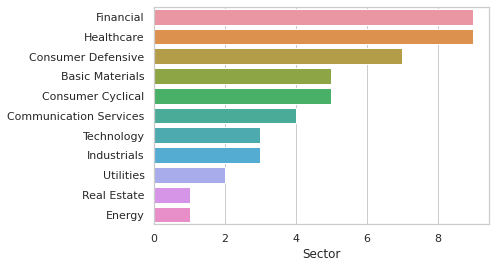

In [41]:
sns.barplot(y=stocks.Sector.value_counts().index, x=stocks.Sector.value_counts())

In [42]:
stocks.drop(['No.','Company','Country','Change', 'Sector', 'Volume'], inplace=True, axis=1)

In [44]:
stocks.head(10)

,Industry,Market Cap,P/E,Price
Ticker,,,,
NAT,Marine Shipping,523.60M,5.69,3.52
CO,Diagnostics & Research,561.61M,7.54,4.57
DHT,Oil & Gas Midstream,1.06B,3.99,6.25
RBBN,Telecom Services,1.19B,18.77,8.37
ELP,Utilities - Diversified,2.95B,5.10,11.24
PRDO,Education & Training Services,884.55M,7.27,12.70
FF,Chemicals,696.01M,6.23,16.16
GTN,Broadcasting,1.94B,5.59,20.66
WILC,Food Distribution,311.74M,19.55,23.30


In [45]:
#Dictionary for finviz industries
industry_dict = {
    'Oil & Gas Midstream': 'ind_oilgasmidstream',
    'Gold':'ind_gold',
    'Scientific & Technical Instruments':'ind_scientifictechnicalinstruments',
    'Apparel Manufacturing':'ind_apparelmanufacturing',
    'Drug Manufacturers - Specialty & Generic':'ind_drugmanufacturersspecialtygeneric',
    'Household & Personal Products':'ind_householdpersonalproducts',
    'Software - Application':'ind_softwareapplication',
    'Education & Training Services':'ind_educationtrainingservices',
    'Chemicals':'ind_chemicals',
    'Staffing & Employment Services':'ind_staffingemploymentservices',
    'Packaging & Containers':'ind_packagingcontainers',
    'Asset Management':'ind_assetmanagement',
    'Diagnostics & Research':'ind_diagnosticsresearch',
    'Communication Equipment':'ind_communicationequipment',
    'Pollution & Treatment Controls':'ind_pollutiontreatmentcontrols',
    'Electronic Components':'ind_electroniccomponents',
    'Apparel Retail':'ind_apparelretail',
    'Lumber & Wood Production':'ind_lumberwoodproduction',
    'Medical Devices':'ind_medicaldevices',
    'Drug Manufacturers - General':'ind_drugmanufacturersgeneral',
    'Biotechnology':'ind_biotechnology',
    'Consulting Services':'ind_consultingservices',
    'Beverages - Non-Alcoholic':'ind_beveragesnonalcoholic',
    'Farm & Heavy Construction Machinery':'ind_farmheavyconstructionmachinery',
    'Computer Hardware':'ind_computerhardware',
    'Internet Content & Information':'ind_internetcontentinformation',
    'Specialty Business Services':'ind_specialtybusinessservices',
    'Software - Infrastructure':'ind_softwareinfrastructure',
    'Semiconductor Equipment & Materials':'ind_semiconductorequipmentmaterials',
    'Electronic Gaming & Multimedia':'ind_electronicgamingmultimedia',
    'Security & Protection Services':'ind_securityprotectionservices',
    'Personal Services':'ind_personalservices',
    'Internet Retail':'ind_internetretail',
    'Financial Data & Stock Exchanges':'ind_financialdatastockexchanges',
    'Medical Instruments & Supplies':'ind_medicalinstrumentssupplies',
    'Health Information Services':'ind_healthinformationservices',
    'Credit Services':'ind_creditservices',
    'Information Technology Services':'ind_informationtechnologyservices',
    'Beverages - Brewers':'ind_beveragesbrewers',
    'Engineering & Construction':'ind_engineeringconstruction',
    'Capital Markets':'ind_capitalmarkets',
    'Insurance - Diversified':'ind_insurancediversified',
    'Specialty Industrial Machinery':'ind_specialtyindustrialmachinery',
    'Medical Distribution':'ind_medicaldistribution',
    'Building Products & Equipment':'ind_buildingproductsequipment',
    'Marine Shipping': 'ind_marineshipping',
    'Utilities - Diversified': 'ind_utilitiesdiversified',
    'Grocery Stores': 'ind_grocerystores',
    'Trucking':'ind_trucking',
    'Medical Care Facilities':'ind_medicalcarefacilities',
    'Auto Parts':'ind_autoparts',
    'Furnishings, Fixtures & Appliances':'ind_furnishingsfixturesappliances',
    'Residential Construction':'ind_residentialconstruction',
    'Industrial Distribution':'ind_industrialdistribution',
    'Insurance Brokers':'ind_insurancebrokers',
    'Packaged Foods':'ind_packagedfoods',
    'Airports & Air Services':'ind_airportsairservices',
    'Semiconductors':'ind_semiconductors',
    'Publishing':'ind_publishing', 
    'Electronics & Computer Distribution':'ind_electronicscomputerdistribution',
    'Real Estate Services':'ind_realestateservices',
    'Auto & Truck Dealerships':'ind_autotruckdealerships',
    'Recreational Vehicles':'ind_recreationalvehicles',
    'Building Materials':'ind_buildingmaterials',
    'Electrical Equipment & Parts':'ind_electricalequipmentparts',
    'Specialty Retail':'ind_specialtyretail',
    'Insurance - Life':'ind_insurancelife',
    'Food Distribution':'ind_fooddistribution',
    'Metal Fabrication':'ind_metalfabrication',
    'Business Equipment & Supplies':'ind_businessequipmentsupplies',
    'Integrated Freight & Logistics':'ind_integratedfreightlogistics',
    'Tools & Accessories':'ind_toolsaccessories',
    'Discount Stores':'ind_discountstores', 
    'Leisure':'ind_leisure',
    'Aerospace & Defense':'ind_aerospacedefense',
    'REIT - Office':'ind_reitoffice',
    'Footwear & Accessories':'ind_footwearaccessories',
    'Home Improvement Retail':'ind_homeimprovementretail',
    'Railroads':'ind_railroads',
    'Telecom Services':'ind_telecomservices',
    'Entertainment':'ind_entertainment',
    'Broadcasting' : 'ind_broadcasting',
    'Steel' : 'ind_steel',
    'Other Industrial Metals & Mining': 'ind_otherindustrialmetalsmining',
    'Banks - Regional': 'ind_banksregional',
    'Insurance - Specialty': 'ind_insurancespecialty',
    'Mortgage Finance': 'ind_mortgagefinance',
    'REIT - Specialty': 'ind_reitspecialty',
    'Rental & Leasing Services': 'ind_rentalleasingservices',
    'Healthcare Plans': 'ind_healthcareplans',
    'Farm Products': 'ind_farmproducts',
    'Banks - Diversified': 'ind_banksdiversified',
    'Insurance - Property & Casualty': 'ind_insurancepropertycasualty'
}

Finding good performing competitors for each company from the stocks dataframe.

In [46]:
competitors = []
i = 0
for row in stocks.index:
  ind = industry_dict[stocks['Industry'].iloc[i]]
  i += 1
  filters_competitor = [ind, 'cap_smallover','fa_pe_o5','sh_price_o80','ta_rsi_nos40']  
  competitors_list = []
  try:
    stock_list_competitor = Screener(filters=filters_competitor, table='Overview', order='price') 
    for stock in stock_list_competitor: 
      competitors_list.append(stock['Ticker'])
  except Exception:
    pass
  if not competitors_list:
    competitors.append('-')
  else:
    competitors.append(competitors_list)
  
stocks['Competitors'] = competitors

Selecting companies with with a low price of a stock and that have good-performing competitors

In [47]:
stocks_to_analyze = stocks[(stocks['Competitors'] != '-')&(stocks['Price'] <= 100)]

In [49]:
stocks_to_analyze.head(10)

,Industry,Market Cap,P/E,Price,Competitors
Ticker,,,,,
CO,Diagnostics & Research,561.61M,7.54,4.57,"[NEOG, FLGT, A, DGX, PRAH, MEDP, ICLR, IQV, DH..."
RBBN,Telecom Services,1.19B,18.77,8.37,"[TMUS, ZM, CABO]"
ELP,Utilities - Diversified,2.95B,5.10,11.24,"[ETR, SRE]"
PRDO,Education & Training Services,884.55M,7.27,12.70,"[STRA, LOPE, GHC]"
FF,Chemicals,696.01M,6.23,16.16,"[EMN, CE, APD]"
GTN,Broadcasting,1.94B,5.59,20.66,[NXST]
SUPN,Drug Manufacturers - Specialty & Generic,1.41B,11.30,26.70,"[CTLT, ZTS]"
PINC,Health Information Services,4.15B,8.10,34.21,[OMCL]
TX,Steel,7.17B,9.07,35.99,[RS]


Replace Competotors' tickers with price change in years and see their performance for the past 3 years.

In [ ]:
results = pd.DataFrame(columns=['Start','End','Difference'])
results_row = pd.DataFrame(columns=['Avg'])
for row in stocks_to_analyze.index:
  for competitor in stocks_to_analyze.Competitors[row]:
    data = pdr.get_data_yahoo(competitor, start=date.today()-timedelta(days=365*3), end=date.today())
    temp = pd.DataFrame(
        {
            'Start': data.Open.iloc[0],
            'End': data.Open.iloc[-1],
            'Difference': data.Open.iloc[-1]/data.Open.iloc[0]
        }, index=[competitor]
    )
    results = pd.concat([results, temp])
  temp_row = pd.DataFrame(
      {
          'Avg':results.Difference.mean()
      }, index = [row]
  )
  results_row = pd.concat([results_row, temp_row])
stocks_to_analyze.drop('Competitors', axis=1, inplace=True)
stocks_to_analyze['competitors_performance'] = results_row

In [52]:
stocks_to_analyze.head(10)

,Industry,Market Cap,P/E,Price,competitors_performance
Ticker,,,,,
CO,Diagnostics & Research,561.61M,7.54,4.57,3.629038
RBBN,Telecom Services,1.19B,18.77,8.37,3.562830
ELP,Utilities - Diversified,2.95B,5.10,11.24,3.562830
PRDO,Education & Training Services,884.55M,7.27,12.70,3.172393
FF,Chemicals,696.01M,6.23,16.16,3.020314
GTN,Broadcasting,1.94B,5.59,20.66,2.952167
SUPN,Drug Manufacturers - Specialty & Generic,1.41B,11.30,26.70,2.889470
PINC,Health Information Services,4.15B,8.10,34.21,2.893237
TX,Steel,7.17B,9.07,35.99,2.808825


Analyzing company's performance and comparing it to other companies. Here we analyze how the price of company's competitors has changed during the 3-year-long period. Positive difference means that the company underperformed competitors and vice versa.

In [ ]:
results_ticker = pd.DataFrame(columns=['Difference'])
for ticker in stocks_to_analyze.index:
  data = pdr.get_data_yahoo(ticker, start=date.today()-timedelta(days=365*3), end=date.today())
  temp = pd.DataFrame(
       {
           'Difference': data.Open.iloc[-1]/data.Open.iloc[0]
       }, index=[ticker]
   )
  results_ticker = pd.concat([results_ticker, temp])
stocks_to_analyze['companys_increase'] = results_ticker
stocks_to_analyze['difference_with_industry'] = stocks_to_analyze['competitors_performance']-stocks_to_analyze['companys_increase']

In [55]:
stocks_to_analyze.head(10)

,Industry,Market Cap,P/E,Price,competitors_performance,companys_increase,difference_with_industry
Ticker,,,,,,,
CO,Diagnostics & Research,561.61M,7.54,4.57,3.629038,0.412656,3.216382
RBBN,Telecom Services,1.19B,18.77,8.37,3.562830,1.579151,1.983679
ELP,Utilities - Diversified,2.95B,5.10,11.24,3.562830,1.362745,2.200085
PRDO,Education & Training Services,884.55M,7.27,12.70,3.172393,0.915047,2.257346
FF,Chemicals,696.01M,6.23,16.16,3.020314,1.193088,1.827226
GTN,Broadcasting,1.94B,5.59,20.66,2.952167,1.516296,1.435871
SUPN,Drug Manufacturers - Specialty & Generic,1.41B,11.30,26.70,2.889470,0.611968,2.277503
PINC,Health Information Services,4.15B,8.10,34.21,2.893237,0.992968,1.900269
TX,Steel,7.17B,9.07,35.99,2.808825,1.088421,1.720404


# Sentiment Analysis

Getting news abut the companies and conducting a sentiment analysis to see if the news are positive or negative. Positivity of the news is import in the long term.

In [56]:
import alpaca_trade_api as tradeapi
from newsapi import NewsApiClient
from flair.data import Sentence
import torch
import flair

In [57]:
api = tradeapi.REST(f'{polygon}',
                    'https://api.polygon.io')


def sentiment(stock, api):
    url = 'https://www.tradingview.com/screener/'
    flair_sentiment = flair.models.TextClassifier.load('en-sentiment')
    newsapi = NewsApiClient(api_key=f'{newsapikey}')
    response = newsapi.get_everything(qintitle=stock)
    news = api.polygon.news(stock)
    file = open('news.txt', 'w')

    sentiment = 0
    for line in response['articles']:
        words = str(line['title'])
        file.write(words)
        sentence = Sentence(str(words))
        flair_sentiment.predict(sentence)
        total_sentiment = sentence.labels

        if total_sentiment[0].value == 'NEGATIVE':
            sentiment -= total_sentiment[0].to_dict()['confidence'] 
        elif total_sentiment[0].value == 'POSITIVE':
            sentiment += total_sentiment[0].to_dict()['confidence']

    for source in news:
        words = source.summary
        try:
            file.write(words)
        except:
            print('FAILSAFE ACTIVATED')
        file.write('\n')
        sentence = Sentence(str(words))
        try:
            flair_sentiment.predict(sentence)
        except:
            print("\n")
        total_sentiment = sentence.labels
        if total_sentiment[0].value == 'NEGATIVE':
          total_sentiment[0].to_dict()['confidence']
        if total_sentiment[0].value == 'POSITIVE':
            total_sentiment[0].to_dict()['confidence']
            sentiment += total_sentiment[0].to_dict()['confidence']

    file.close()
    return sentiment


In [ ]:
sentiments = pd.DataFrame(columns=['Sentiment'])
import time
for ticker in stocks_to_analyze.index:
  x = sentiment(ticker, api)
  temp = pd.DataFrame(
       {
           'Sentiment': x
       }, index=[ticker]
   )
  sentiments = pd.concat([sentiments, temp])
  time.sleep(15)
stocks_to_analyze['Sentiment'] = sentiments

Setting total multiplier that relys on competitors' performance and company's sentiment

In [ ]:
stocks_to_analyze['difference_multiplier'] = ''
stocks_to_analyze['sentiment_multiplier'] = ''
difference_sent = stocks_to_analyze['Sentiment'].mean()
difference = stocks_to_analyze['difference_with_industry'].mean()
for ticker in stocks_to_analyze.index:
  if (stocks_to_analyze['difference_with_industry'].loc[ticker] > difference).all():
    stocks_to_analyze['difference_multiplier'][ticker] =  2
  elif ((stocks_to_analyze['difference_with_industry'].loc[ticker] < difference) & (stocks_to_analyze['difference_with_industry'].loc[ticker] > 0)).all():
    stocks_to_analyze['difference_multiplier'][ticker] =  1
  else:
    stocks_to_analyze['difference_multiplier'][ticker] = 0.5
  
  if (stocks_to_analyze['Sentiment'].loc[ticker] > difference_sent).all():
    stocks_to_analyze['sentiment_multiplier'][ticker] =  2
  elif ((stocks_to_analyze['Sentiment'].loc[ticker] < difference_sent) & (stocks_to_analyze['Sentiment'].loc[ticker] > 0)).all():
    stocks_to_analyze['sentiment_multiplier'][ticker] =  1
  else:
    stocks_to_analyze['sentiment_multiplier'][ticker] = 0.5

stocks_to_analyze['total_multiplier'] = stocks_to_analyze['sentiment_multiplier'] * stocks_to_analyze['difference_multiplier']
stocks_to_analyze.drop(['difference_multiplier','sentiment_multiplier'], axis=1, inplace=True)

In [73]:
stocks_to_analyze

,Industry,Market Cap,P/E,Price,competitors_performance,companys_increase,difference_with_industry,Sentiment,total_multiplier
Ticker,,,,,,,,,
CO,Diagnostics & Research,561.61M,7.54,4.57,3.629038,0.412656,3.216382,22.775983,4
RBBN,Telecom Services,1.19B,18.77,8.37,3.562830,1.579151,1.983679,27.084392,4
ELP,Utilities - Diversified,2.95B,5.10,11.24,3.562830,1.362745,2.200085,14.147846,0.5
PRDO,Education & Training Services,884.55M,7.27,12.70,3.172393,0.915047,2.257346,0.821836,2
FF,Chemicals,696.01M,6.23,16.16,3.020314,1.193088,1.827226,21.174851,2
GTN,Broadcasting,1.94B,5.59,20.66,2.952167,1.516296,1.435871,5.910061,0.5
SUPN,Drug Manufacturers - Specialty & Generic,1.41B,11.30,26.70,2.889470,0.611968,2.277503,10.926441,2
PINC,Health Information Services,4.15B,8.10,34.21,2.893237,0.992968,1.900269,31.331685,4
TX,Steel,7.17B,9.07,35.99,2.808825,1.088421,1.720404,20.158311,0.5


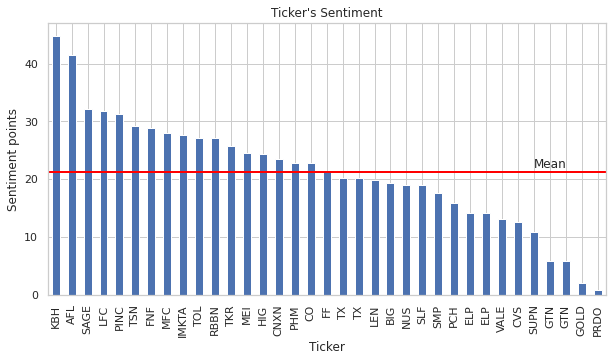

In [81]:
plt.figure(figsize=(10,5))
ax = stocks_to_analyze.Sentiment.sort_values(ascending=False).plot(kind='bar')
ax.axhline(stocks_to_analyze.Sentiment.mean(), color='red', linewidth=2, label='Mean')
plt.text(30,22,'Mean')
ax.set(ylabel='Sentiment points', title='Ticker\'s Sentiment')
plt.show()

# Portfolio allocation

In [ ]:
total_money = 100000  #initial funds are equal $100.000
total_mult = stocks_to_analyze.total_multiplier.sum()
stocks_to_analyze['money_to_place'] = ''
stocks_to_analyze['stocks_to_buy'] = ''
for row in stocks_to_analyze.index:
  stocks_to_analyze['money_to_place'][row] = (total_money * (stocks_to_analyze['total_multiplier'][row]/total_mult) )  
  stocks_to_analyze['stocks_to_buy'][row] = (stocks_to_analyze['money_to_place'][row] / stocks_to_analyze['Price'][row])

In [77]:
stocks_to_analyze[['money_to_place', 'stocks_to_buy']]

,money_to_place,stocks_to_buy
Ticker,,
CO,6060.61,1326.17
RBBN,6060.61,724.087
ELP,757.576,67.4
PRDO,3030.3,238.607
FF,3030.3,187.519
GTN,757.576,36.6687
SUPN,3030.3,113.494
PINC,6060.61,177.159
TX,757.576,21.0496


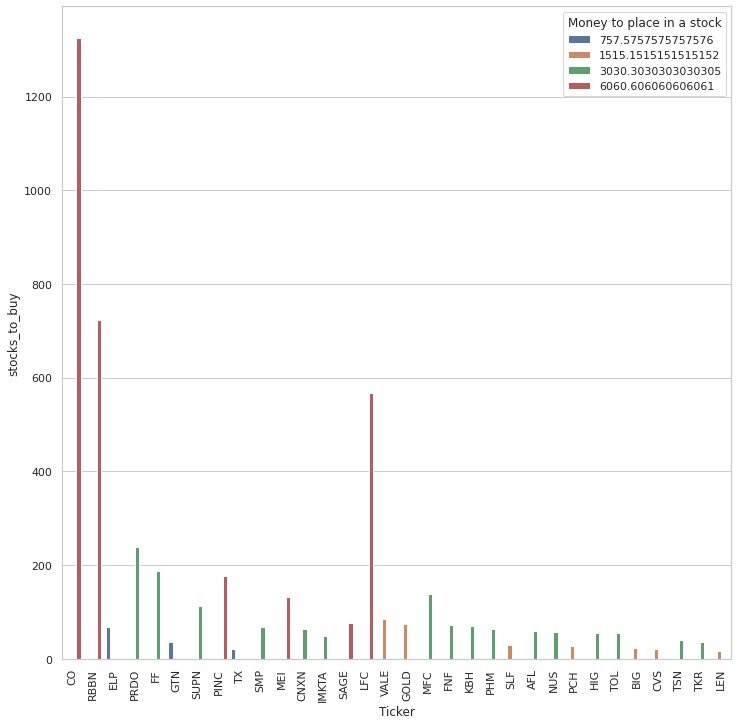

In [103]:
fig, ax1 = plt.subplots(figsize=(12, 12))
sns.barplot(x=stocks_to_analyze.index, hue='money_to_place', y='stocks_to_buy', data=stocks_to_analyze, ax=ax1)
ax1.legend(title='Money to place in a stock')
ax1.set(xlabel='Ticker')
plt.xticks(rotation=90)
plt.show()

#After we analyzed companies, compared them with their competitors and conducted a sentiment analysis we got a portfolio with a suggested amount of stocks to buy. It is not a financial advice, leverage the acquired insights in your own further analysis.